In [1]:
from data_generator.batch_generator_params import BatchGeneratorParams
from data_generator.batch_generator import BatchGenerator
from data_processing.data_normalization_params import DataNormalizationParams
import matplotlib.pyplot as plt

bg_train_config = BatchGeneratorParams.submission_val_data
bg_train_config['normalization_settings'] = DataNormalizationParams.default

In [2]:
bg = BatchGenerator(**bg_train_config)
X, y = bg.__getitem__(5)

2022-07-11 09:05:56.885021   [UtilFunctions] Found an existing folder for C:\Informatik\workspaces\workspace_python\AI-Cup\tables\submission
2022-07-11 09:05:56.886024   [UtilFunctions] Found an existing folder for C:\Informatik\workspaces\workspace_python\AI-Cup\metadata\submission
2022-07-11 09:05:56.886024   [BatchGenerator] Started initialization ...
2022-07-11 09:05:56.886024   [BatchGenerator] Selected dataset: submission
2022-07-11 09:05:56.886024   [BatchGenerator] Selected normalization function: original
2022-07-11 09:05:56.887029   [BatchGenerator] Selected normalization mode: by_time_series
2022-07-11 09:05:56.888021   [BatchGenerator] Parsing and verifying index C:\Informatik\workspaces\workspace_python\AI-Cup\data\submission\csv_index_submission.txt
2022-07-11 09:05:56.938556   [BatchGenerator] Found 345 data files.
2022-07-11 09:05:56.938556   [BatchGenerator] Found existing version of table in C:\Informatik\workspaces\workspace_python\AI-Cup\tables\submission\submission

C:\Users\paulr\AppData\Local\Temp\ipykernel_10868\548285052.py:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


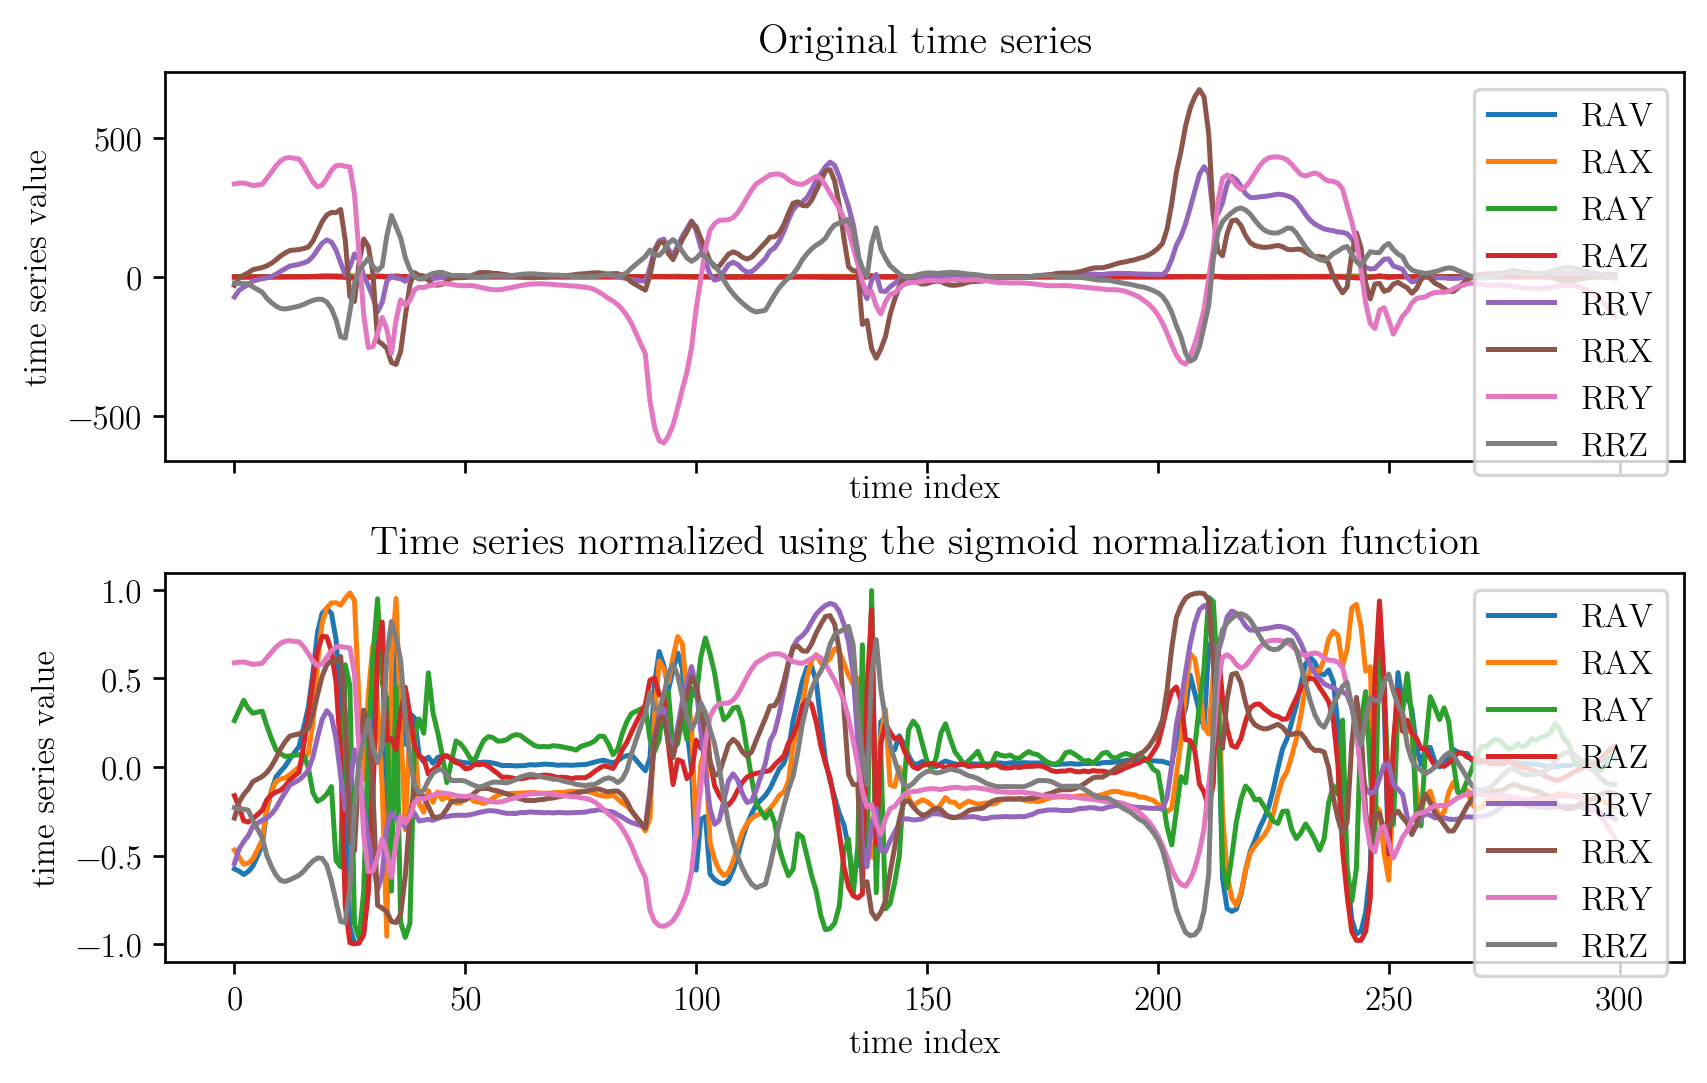

In [6]:
from data_processing.normalization_functions.min_max_symmetrical import min_max_symmetrical
from data_processing.normalization_functions.tanh_estimator import tanh_estimator
from data_processing.normalization_functions.standardization import standardization
from data_processing.normalization_functions.median_normalization import median_normalization
from data_processing.normalization_functions.sigmoid_normalization import sigmoid_normalization
from data_processing.normalization_functions.decimal_scaling_normalization import decimal_scaling_normalization
import numpy as np
import matplotlib

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Latin Modern Roman'
matplotlib.rcParams['figure.dpi'] = 240

functions = {
    #'Min-Max Symmetrical': min_max_symmetrical,
    #'Tanh estimator': tanh_estimator,
    #'Standardization': standardization,
    'sigmoid normalization': sigmoid_normalization,
    #'Median Normalization': median_normalization,
    #'Decimal Scaling Normalization': decimal_scaling_normalization,
}

NUMBER_OF_PLOTS = 8
plt.rcParams["figure.figsize"] = (7,3.4 * len(functions) + 1)

plt_labels = ['RAV', 'RAX', 'RAY', 'RAZ', 'RRV', 'RRX', 'RRY', 'RRZ']

fig, axs = plt.subplots(len(functions) + 1, 1, constrained_layout=True, sharey=False,sharex=True)
#fig.suptitle("Normalization techniques ", fontsize=16)

axs[0].set_title('Original time series')
plots = axs[0].plot(X[0,:300,:8], label= plt_labels)
axs[0].legend(loc="upper right")
axs[0].set(xlabel='time index', ylabel='time series value')


j = 1
for name in functions.keys():
    X_ = np.copy(X)



    function = functions[name]

    for i in range(8):
        x = X_[0,:300,i:i+1]
        x_ = function(x.tolist())

        axs[j].plot(x_, label=plt_labels[i])

    axs[j].legend(loc="upper right")
    axs[j].set_title(f'Time series normalized using the {name} function')
    axs[j].set(xlabel='time index', ylabel='time series value')


    j += 1

fig.show()



